In [1]:
import matplotlib.pyplot as plt
from handling import get_templates
import numpy as np

def show_object_and_mask(img_obj_RGB, img_obj_alpha):
    
    if img_obj_RGB is not None and img_obj_alpha is not None:
        plt.subplot(1, 2, 1)
        plt.imshow(img_obj_RGB)
        plt.title('Color Image')
        plt.subplot(1, 2, 2)
        plt.imshow(img_obj_alpha, cmap='gray')
        plt.title('Alpha Channel Grayscale Image')
        plt.show()
    
    elif img_obj_RGB is None:
        plt.imshow(img_obj_alpha, cmap='gray')
        plt.title('Alpha Channel Grayscale Image')
        plt.show()

    else:
        plt.imshow(img_obj_RGB)
        plt.title('Color Image')
        plt.show()

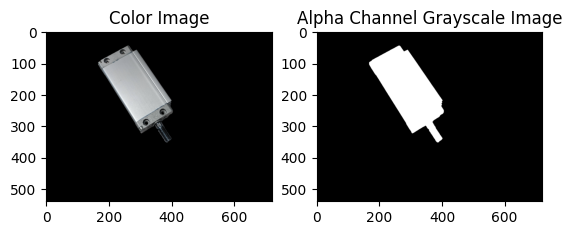

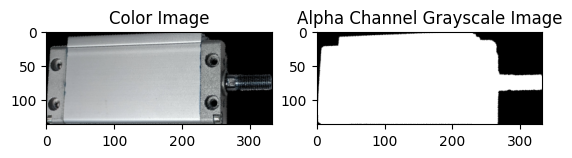

57.8599967956543

In [4]:
import cv2

src_imgs = get_templates(["cylinder"], r"C:\Users\tsx10\PythonProjectsJupyter\TUM\MA\Paste-Step-new\data\synthetic_images\02_imgs", (720, 540))
size_x = 720
size_y = 540

img = src_imgs[np.random.randint(0, len(src_imgs))][np.random.randint(0, len(src_imgs[np.random.randint(0, len(src_imgs))]))]

show_object_and_mask(img[:, :, :3], img[:, :, 3])

contours, _ = cv2.findContours(img[:, :, 3].copy().astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rect = cv2.minAreaRect(np.vstack(contours))

width = int(rect[1][0])
height = int(rect[1][1])
angle = rect[2]

rotation_matrix = cv2.getRotationMatrix2D(tuple(rect[0]), angle, 1)
rotated_image = cv2.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]))

cropped_image = rotated_image[int(rect[0][1]-height/2):int(rect[0][1]+height/2), int(rect[0][0]-width/2):int(rect[0][0]+width/2)]

if cropped_image.shape[0] > cropped_image.shape[1]:
    cropped_image = cv2.transpose(cropped_image)
    cropped_image = cv2.flip(cropped_image, 1)

show_object_and_mask(cropped_image[:, :, :3], cropped_image[:, :, 3])
angle